In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
BASE_PATH = os.path.join(os.getcwd(), os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'data')

In [3]:
train_df = pd.read_json(os.path.join(DATA_PATH, 'train.json'))

# Identifying outliers & missing values
## Price

In [4]:
missing_price = len(train_df[train_df.astype(str)['price'].isnull()])

missing_price

0

In [6]:
price = train_df[['price']]

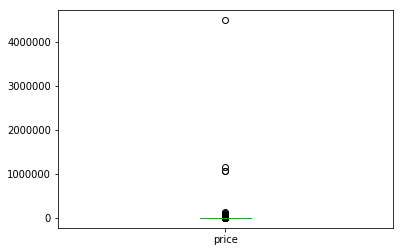

In [7]:
price.plot(kind='box')

In [8]:
price_filtered = train_df[(train_df['price']>99) & (train_df['price'] < 1000000)]['price']

price_filtered.sort_values()

117339       401
113599       695
85617        695
102756       695
113552       695
22693        700
109164       800
61138        868
8142         950
77180        950
51007        950
85929        975
91356        980
88385        999
115551       999
83581        999
95901        999
18643       1000
17726       1000
61286       1025
119554      1034
104078      1034
105367      1048
18936       1050
120553      1050
19673       1050
92767       1050
84647       1050
109831      1095
121747      1100
           ...  
59987      31500
50615      31500
9416       31500
30045      35000
47322      35000
111962     35000
106259     35000
4653       36000
112071     37000
93175      38000
41252      39995
57632      39995
13701      45000
5395       45000
56508      48500
122319     50000
57976      50000
22997      50000
30763      50550
89759      50614
118212     53100
60250      55000
514        58020
84566      60000
96905      80000
116586     85000
54148      90000
91709     1000

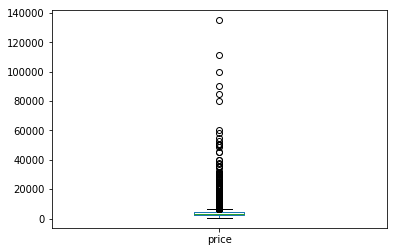

In [9]:
price_filtered.plot(kind='box')

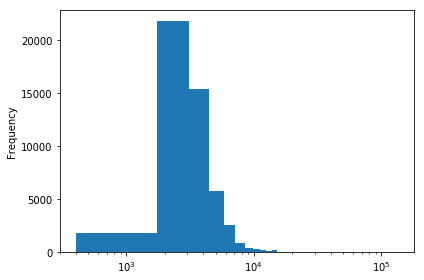

In [30]:
price_filtered.plot.hist(bins=100, logx=True)
plt.tight_layout()

## Latitude/Longitude

In [12]:
missing_latitude = len(train_df[train_df.astype(str)['latitude'] == ''])

missing_latitude

0

In [13]:
missing_longitude = len(train_df[train_df['longitude'].isnull()])

missing_longitude

0

## Bathrooms

In [14]:
baths = train_df[['bathrooms']]

baths.sort_values('bathrooms')

,bathrooms
122455,0.0
24340,0.0
78283,0.0
17145,0.0
107073,0.0
79800,0.0
64339,0.0
86108,0.0
19335,0.0
24337,0.0


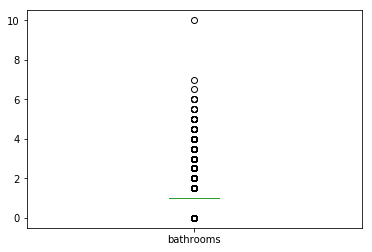

In [16]:
baths.plot(kind='box')

In [17]:
missing_baths = len(train_df[(train_df['bathrooms'].isnull()) | (train_df['bathrooms']==0)])

missing_baths

313

## Bedrooms

In [18]:
missing_beds = len(train_df[(train_df['bedrooms'].isnull())])

missing_beds

0

In [20]:
beds = train_df[['bedrooms']]

beds.sort_values('bedrooms')

,bedrooms
79269,0
39897,0
87257,0
69032,0
39881,0
39866,0
39864,0
87233,0
8723,0
39858,0


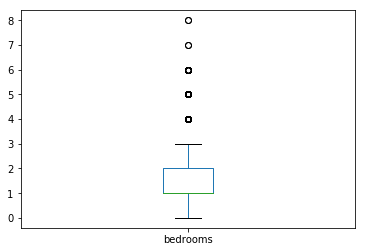

In [21]:
beds.plot(kind='box')

## Features

In [22]:
missing_features = len(train_df[train_df['features'].map(lambda d: len(d)) == 0])

missing_features

3218

## Description

In [23]:
missing_description = len(train_df[train_df['description'].map(lambda d: len(d)) == 0])

missing_description

1446

## Display Address

In [24]:
missing_address = len(train_df[train_df['display_address'].map(lambda d: len(d)) == 0])

missing_address

135

## Street address

In [25]:
missing_stAddress = len(train_df[train_df['street_address'].map(lambda d: len(d)) == 0])

missing_stAddress

10

## Photos

In [26]:
missing_photos= len(train_df[train_df['photos'].map(lambda d: len(d)) == 0])

missing_photos

3615